In [28]:
# df = spark.read.format('json').load("hdfs://orion11:33001/reddit/sampled_reddit/part-00000-e97c075c-b0b4-49da-b85b-f77c115b75b6-c000.json")
df = spark.read.format('json').load("hdfs://orion11:33001/reddit/sampled_reddit/*")
print(df.count())

309199315


In [29]:
from pyspark.sql.functions import year, month, dayofmonth, from_unixtime, desc
from pyspark.sql.types import TimestampType, DateType

botExpr = "[bB][oO][tT]"

df2 = (df
        .filter(~(df.body.like("[deleted]") | df.author.rlike(botExpr))))

In [30]:
df3 = df2.select("body", "subreddit").filter(df2.subreddit=="softwaredevelopment")

In [31]:
print(df3.count())

354


In [32]:
df3.show()

+--------------------+-------------------+
|                body|          subreddit|
+--------------------+-------------------+
|&gt; they don't r...|softwaredevelopment|
|This article is a...|softwaredevelopment|
|If you were a C++...|softwaredevelopment|
|I suspect there i...|softwaredevelopment|
|It doesn't say AN...|softwaredevelopment|
|&gt;Those numbers...|softwaredevelopment|
|It's not necessar...|softwaredevelopment|
|gpl -&gt; the cod...|softwaredevelopment|
|It will be hosted...|softwaredevelopment|
|If you other opti...|softwaredevelopment|
|I like the idea. ...|softwaredevelopment|
|Is he humping the...|softwaredevelopment|
|Thanks! Maybe I'l...|softwaredevelopment|
|you're really goi...|softwaredevelopment|
|Isn't this just a...|softwaredevelopment|
|I believe that GP...|softwaredevelopment|
|Well, the details...|softwaredevelopment|
|Perhaps you shoul...|softwaredevelopment|
|Thanks.  I can ac...|softwaredevelopment|
|Yeah, that's exac...|softwaredevelopment|
+----------

In [33]:
pandas_df = df3.toPandas()

In [34]:
pandas_df.subreddit.unique()

array(['softwaredevelopment'], dtype=object)

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
# corpus = pandas_df[pandas_df.subreddit == 'softwaredevelopment'].body.tolist()
corpus = pandas_df.body.tolist()
# join_corpus = [' '.join(corpus)]
stopwords = list(STOPWORDS)
vectorizer = TfidfVectorizer(stop_words = stopwords)

X = vectorizer.fit_transform(corpus)


# print(vectorizer.get_feature_names())
# print(X.shape)

/home2/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [36]:
feature_names=vectorizer.get_feature_names()
score_vals = []
feature_vals = []

coo_matrix = X.tocoo()
tuples = zip(coo_matrix.col, coo_matrix.data)

# word index and corresponding tf-idf score
for idx, score in tuples:

    #keep track of feature name and its corresponding score
    score_vals.append(round(score, 3))
    feature_vals.append(feature_names[idx])

#create a tuples of feature,score
#results = zip(feature_vals,score_vals)
results= {}
for idx in range(len(feature_vals)):
    results[feature_vals[idx]]=score_vals[idx]

In [37]:
results

{'ahem': 0.152,
 'mean': 0.161,
 'didn': 0.07,
 'said': 0.07,
 'talks': 0.047,
 'paragraph': 0.152,
 'machines': 0.179,
 'installed': 0.214,
 'software': 0.275,
 'mostly': 0.138,
 'refers': 0.152,
 'standardized': 0.152,
 'everything': 0.035,
 'knows': 0.393,
 'nobody': 0.095,
 'breaks': 0.152,
 'schema': 0.212,
 'ldap': 0.152,
 'depends': 0.043,
 'dependencies': 0.136,
 'wide': 0.152,
 'system': 0.139,
 'exactly': 0.039,
 'especially': 0.169,
 'anything': 0.115,
 'changing': 0.078,
 'twice': 0.152,
 'think': 0.097,
 'department': 0.152,
 'number': 0.124,
 'priority': 0.036,
 'running': 0.098,
 'business': 0.092,
 'keeping': 0.134,
 'big': 0.11,
 'amplified': 0.152,
 'effects': 0.152,
 'companies': 0.085,
 'happens': 0.354,
 'definitely': 0.083,
 'observation': 0.152,
 'great': 0.255,
 'change': 0.054,
 'won': 0.106,
 'systems': 0.029,
 'know': 0.094,
 'really': 0.094,
 'don': 0.088,
 'gt': 0.135,
 'read': 0.049,
 've': 0.263,
 'best': 0.223,
 'one': 0.09,
 'classic': 0.278,
 'article'

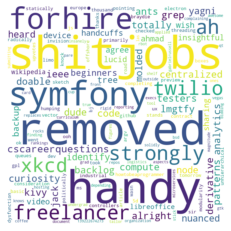

In [38]:
from wordcloud import WordCloud, STOPWORDS
# Generate a word cloud image
# text = "Hello World Hello"
# wordcloud = WordCloud().generate(text)
stopwords = set(STOPWORDS) 
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate_from_frequencies(results) 


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()